<a href="https://colab.research.google.com/github/kevintsi/deep_learning_course/blob/main/deep_learning_course_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning course

In [2]:
## Install fastbook
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastbook import *

## Deep learning image recognication

In [4]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

path

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.178007,0.018974,0.006089,01:42


epoch,train_loss,valid_loss,error_rate,time
0,0.054812,0.009307,0.003383,02:18


In [5]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [7]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


## Deep Learning is not just for Image Classification

In [8]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.603919,1.927352,00:04


epoch,train_loss,valid_loss,time
0,1.576138,1.294952,00:04
1,1.448174,1.254557,00:04
2,1.327816,0.984560,00:04
3,1.208267,0.819564,00:04
4,1.080528,0.739201,00:04
5,0.977695,0.714635,00:04
6,0.895555,0.692372,00:04
7,0.832052,0.692262,00:04


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


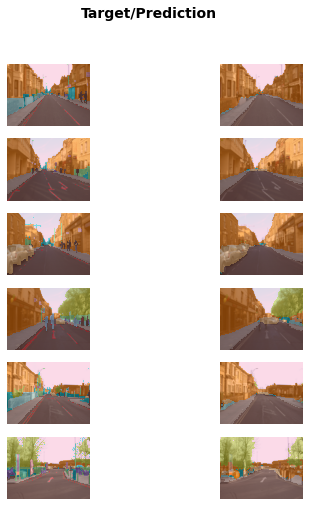

In [9]:
learn.show_results(max_n=6, figsize=(7,8))

In [10]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

Process Process-45:
Process Process-46:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.7/dist-packages/fastcore/parallel.py", line 142, in _f_pg
    for i,b in enumerate(obj(batch)): queue.put((start_idx+i,b))
  File "/usr/local/lib/python3.7/dist-packages/fastai/text/core.py", line 136, in <genexpr>
    return (L(o).map(self.post_f) for o in self.tok(maps(*self.rules, batch)))
  File "/usr/local/lib/python3.7/dist-packages/fastai/text/core.py", line 122, in <genexpr>
    return (L(doc).attrgot('text') for doc in self.pipe(map(str,items), batch_size=self.buf_sz))
  File "/usr/local/lib/python3.7/dist-packages/spacy/language.py", l

KeyboardInterrupt: ignored

## Construire des modèles à partir de données tabulaires

In [11]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE) ## Path to datasets

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy) ## Create model

In [12]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.380514,0.373299,0.832463,00:07
1,0.362846,0.355017,0.836609,00:07
2,0.357523,0.351320,0.838913,00:07


In [13]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.523289,1.381516,00:00


epoch,train_loss,valid_loss,time
0,1.396122,1.319708,00:00
1,1.277794,1.132567,00:00
2,1.022374,0.830664,00:00
3,0.800652,0.694179,00:00
4,0.700407,0.659416,00:00
5,0.658882,0.647847,00:00
6,0.638177,0.643430,00:00
7,0.621591,0.641302,00:00
8,0.607097,0.640517,00:00
9,0.607002,0.640406,00:00


In [14]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,5.0,81.0,5.0,4.451847
1,68.0,76.0,2.0,3.938959
2,88.0,97.0,3.5,3.962249
3,55.0,78.0,2.5,3.165076
4,34.0,67.0,5.0,4.236148
5,39.0,55.0,4.0,4.179372
6,5.0,44.0,4.0,3.103317
7,13.0,57.0,4.0,4.266764
8,16.0,33.0,4.0,3.128462
